In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [ ]:
df = pd.read_excel("Temperature in Sao Paulo.xlsx",index_col='Date',parse_dates=True, sheet_name="NASDAQ")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

In [ ]:
scaler = MinMaxScaler()

Best hyperparameters

Epoch: 7 | Inputs: 21 | Nodes: 168 | Dropout: 0 | Loss: huber_loss




# H=1 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range(14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 3
  n_input = 21
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(168, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(len(test)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(test/true_predictions-np.log(test/true_predictions)-1)/len(test))

Streaminguitvoer ingekort tot de laatste 5000 regels.
1/1 [==============================] - 0s 26ms/step
Epoch 1/7
112/112 [==============================] - 3s 7ms/step - loss: 0.0016 - accuracy: 2.8050e-04 - mean_absolute_error: 0.0380
Epoch 2/7
112/112 [==============================] - 1s 7ms/step - loss: 0.0012 - accuracy: 2.8050e-04 - mean_absolute_error: 0.0324
Epoch 3/7
112/112 [==============================] - 1s 7ms/step - loss: 0.0011 - accuracy: 2.8050e-04 - mean_absolute_error: 0.0301
Epoch 4/7
112/112 [==============================] - 1s 7ms/step - loss: 9.7137e-04 - accuracy: 2.8050e-04 - mean_absolute_error: 0.0282
Epoch 5/7
112/112 [==============================] - 1s 7ms/step - loss: 9.6338e-04 - accuracy: 2.8050e-04 - mean_absolute_error: 0.0282
Epoch 6/7
112/112 [==============================] - 1s 7ms/step - loss: 0.0010 - accuracy: 2.8050e-04 - mean_absolute_error: 0.0292
Epoch 7/7
1/1 [==============================] - 0s 25ms/step
Epoch 1/7
112/112 [=======

In [ ]:
Accuracy

[43.47970911431429,
 57.71982037957475,
 55.69258194124407,
 53.035788251005464,
 64.0049649650253,
 48.27795358638775,
 38.28072393185838,
 51.20711354408138,
 57.37079760756155,
 55.12330685460994,
 65.12846689062604,
 32.70302056195976,
 65.17976389653543,
 64.52126892318137,
 63.977093778506465]

In [ ]:
RMSE

[0.0035946167352697814,
 0.003122923092855713,
 0.0031150584504219528,
 0.003232251481463441,
 0.0029934317047325557,
 0.00339861103025971,
 0.00380620190636967,
 0.003304405094219583,
 0.003089432447321111,
 0.0031710079126216913,
 0.0029320921462406982,
 0.004086095707520319,
 0.0028883861943764574,
 0.0029978660014069857,
 0.0029285354636219363]

In [ ]:
Quasilikelihood

[0.11399692170171506,
 0.09582351101402523,
 0.0959741039326291,
 0.10013671588751571,
 0.10150253840178951,
 0.10479662756684058,
 0.12265361398263754,
 0.10085215110435351,
 0.09462970800661608,
 0.09697516590188271,
 0.09942361819269807,
 0.13337594426640062,
 0.09518271327382094,
 0.10386570419609051,
 0.09507574140674312]

In [ ]:
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

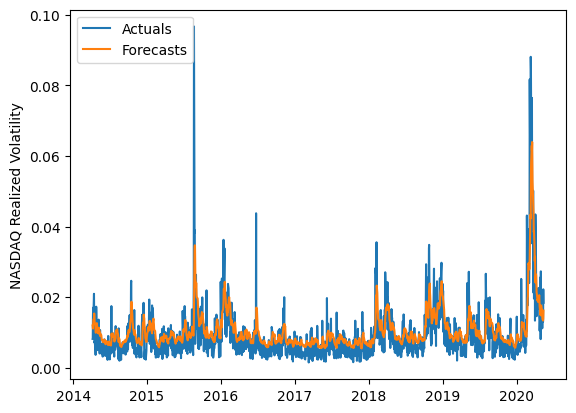

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=3 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range (5):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 3
  n_input = 21
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(168, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(3))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/3)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,3:,:],[a[j*3:(j+1)*3]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  test=test[:len(test)-1]
  true_predictions=true_predictions.reshape(len(test),1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(test/true_predictions-np.log(test/true_predictions)-1)/len(test))

Epoch 1/7
112/112 [==============================] - 3s 6ms/step - loss: 0.0020 - accuracy: 0.4592 - mean_absolute_error: 0.0428
Epoch 2/7
112/112 [==============================] - 1s 7ms/step - loss: 0.0012 - accuracy: 0.5063 - mean_absolute_error: 0.0324
Epoch 3/7
112/112 [==============================] - 1s 7ms/step - loss: 0.0012 - accuracy: 0.3947 - mean_absolute_error: 0.0322
Epoch 4/7
112/112 [==============================] - 1s 6ms/step - loss: 0.0010 - accuracy: 0.2872 - mean_absolute_error: 0.0288
Epoch 5/7
112/112 [==============================] - 1s 5ms/step - loss: 9.9643e-04 - accuracy: 0.3265 - mean_absolute_error: 0.0284
Epoch 6/7
112/112 [==============================] - 1s 5ms/step - loss: 0.0010 - accuracy: 0.4093 - mean_absolute_error: 0.0293
Epoch 7/7
1/1 [==============================] - 0s 19ms/step
Epoch 1/7
112/112 [==============================] - 4s 7ms/step - loss: 0.0018 - accuracy: 0.1930 - mean_absolute_error: 0.0411
Epoch 2/7
112/112 [============

In [ ]:
Accuracy

[57.579359765409265,
 64.55768277290655,
 63.15233853996274,
 62.30733123778658,
 64.2727294480207,
 63.32554268901569,
 59.7855484004364,
 52.08920313646856,
 50.827128338402574,
 63.32810846927745,
 61.744063511133106,
 55.82653587453261,
 54.94658725804806,
 59.63094832576235,
 62.821175413194005]

In [ ]:
RMSE

[0.0032641481128239344,
 0.00336645151386877,
 0.0032842966046237473,
 0.0032144129912159473,
 0.003324035957149475,
 0.0032586498132584733,
 0.0032416921931292864,
 0.003409456503274176,
 0.0034766673565520064,
 0.003204308150340105,
 0.003313936197447948,
 0.0033009259639402897,
 0.0033357102617310973,
 0.0032310902822701142,
 0.0031707824643526623]

In [ ]:
Quasilikelihood

[0.10844369542561967,
 0.17174396855192844,
 0.14113451975949096,
 0.12041724545533584,
 0.16318055728543623,
 0.13528479754186049,
 0.11338581881449183,
 0.11019112217728606,
 0.11365089658356559,
 0.12416383852883817,
 0.13768659628319482,
 0.10877393415124814,
 0.11063798713651196,
 0.11101394184876696,
 0.11570605289425134]

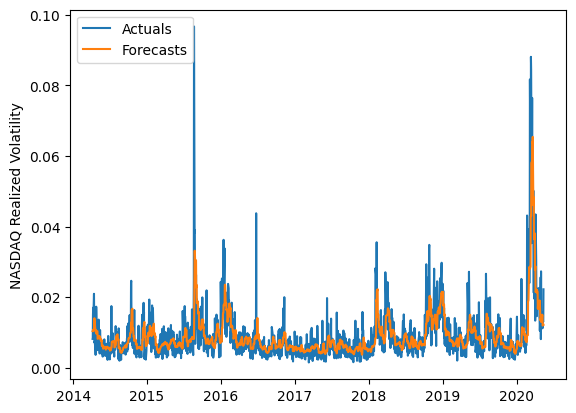

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=5 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range (14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 3
  n_input = 21
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(168, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(5))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/5)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,5:,:],[a[j*5:(j+1)*5]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  test=test[:len(test)-2]
  true_predictions=true_predictions.reshape(len(test),1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(test/true_predictions-np.log(test/true_predictions)-1)/len(test))

Epoch 1/7
112/112 [==============================] - 3s 5ms/step - loss: 0.0021 - accuracy: 0.3173 - mean_absolute_error: 0.0429
Epoch 2/7
112/112 [==============================] - 1s 8ms/step - loss: 0.0012 - accuracy: 0.3139 - mean_absolute_error: 0.0323
Epoch 3/7
112/112 [==============================] - 1s 8ms/step - loss: 0.0011 - accuracy: 0.3983 - mean_absolute_error: 0.0305
Epoch 4/7
112/112 [==============================] - 1s 6ms/step - loss: 0.0010 - accuracy: 0.3173 - mean_absolute_error: 0.0284
Epoch 5/7
112/112 [==============================] - 1s 6ms/step - loss: 9.9823e-04 - accuracy: 0.3139 - mean_absolute_error: 0.0284
Epoch 6/7
112/112 [==============================] - 1s 5ms/step - loss: 9.9656e-04 - accuracy: 0.2794 - mean_absolute_error: 0.0285
Epoch 7/7
1/1 [==============================] - 0s 19ms/step
Epoch 1/7
112/112 [==============================] - 4s 7ms/step - loss: 0.0017 - accuracy: 0.2367 - mean_absolute_error: 0.0388
Epoch 2/7
112/112 [========

In [ ]:
Accuracy

[53.94950588374792,
 58.06469170835344,
 50.969564933108735,
 59.03589524741513,
 50.91674934552009,
 41.98049024965601,
 45.44828773353331,
 50.66359236639987,
 55.650777428603405,
 55.412399272215374,
 61.99142299710723,
 61.7063518371369,
 62.82574799561482,
 56.92542982213475,
 53.99387243214186]

In [ ]:
RMSE

[0.0034563417490267247,
 0.003364107953288315,
 0.0036301079113842494,
 0.0035156342910136733,
 0.0036261648121033423,
 0.0039047334873389384,
 0.003731103486287871,
 0.0035843661012937337,
 0.003481669911641206,
 0.0034881284201382767,
 0.0034310404806968554,
 0.0033222566356249585,
 0.003448615317573295,
 0.003406495404297185,
 0.003520675121214384]

In [ ]:
Quasilikelihood

[0.11874307949416123,
 0.12106453662319473,
 0.12084825209846815,
 0.13704667026951048,
 0.1200237194421258,
 0.1295117670690819,
 0.1240390574009782,
 0.11995019470486463,
 0.1213019304253478,
 0.12154574507051884,
 0.15223032638748174,
 0.13399127162601127,
 0.18125443969815414,
 0.12029132283251359,
 0.11983034172722896]

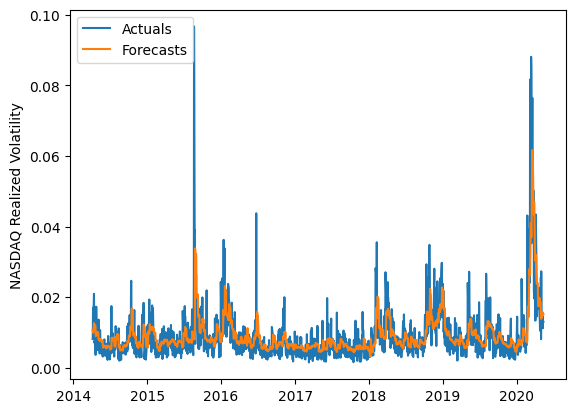

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=10 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range(14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 3
  n_input = 21
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(168, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(10))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/10)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,10:,:],[a[j*10:(j+1)*10]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  test=test[:len(test)-7]
  true_predictions=true_predictions.reshape(len(test),1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(test/true_predictions-np.log(test/true_predictions)-1)/len(test))

Epoch 1/7
112/112 [==============================] - 3s 5ms/step - loss: 0.0018 - accuracy: 0.0084 - mean_absolute_error: 0.0401
Epoch 2/7
112/112 [==============================] - 1s 6ms/step - loss: 0.0013 - accuracy: 0.0264 - mean_absolute_error: 0.0332
Epoch 3/7
112/112 [==============================] - 1s 5ms/step - loss: 0.0011 - accuracy: 0.0561 - mean_absolute_error: 0.0304
Epoch 4/7
112/112 [==============================] - 1s 6ms/step - loss: 0.0010 - accuracy: 0.1170 - mean_absolute_error: 0.0291
Epoch 5/7
112/112 [==============================] - 1s 6ms/step - loss: 0.0011 - accuracy: 0.0858 - mean_absolute_error: 0.0299
Epoch 6/7
112/112 [==============================] - 1s 6ms/step - loss: 0.0010 - accuracy: 0.1018 - mean_absolute_error: 0.0284
Epoch 7/7
1/1 [==============================] - 0s 20ms/step
Epoch 1/7
112/112 [==============================] - 3s 5ms/step - loss: 0.0019 - accuracy: 0.0132 - mean_absolute_error: 0.0395
Epoch 2/7
112/112 [================

In [ ]:
Accuracy

[58.64834690986736,
 48.73180244681497,
 56.96705996413909,
 59.765511239973975,
 57.134687905442604,
 47.20099252803105,
 37.0672974983446,
 6.145238316416735,
 52.380434314333904,
 48.78815279583721,
 46.16989207316921,
 57.1263656886699,
 55.54101738305326,
 54.76755875994846,
 49.983135852037066]

In [ ]:
RMSE

[0.003683382335114937,
 0.0039616500413701735,
 0.003692192328846894,
 0.003696778758605459,
 0.0037780210771815948,
 0.003953797389874101,
 0.004243476040885543,
 0.005456484253404918,
 0.003813679326365063,
 0.003850854079284242,
 0.0038944408628207405,
 0.0036007461421679256,
 0.0036507594566636448,
 0.0038691382078880985,
 0.003786903644960546]

In [ ]:
Quasilikelihood

[0.16112967047554683,
 0.1360001283713246,
 0.15063618382156302,
 0.17422361491621152,
 0.16300593890078036,
 0.1363811329095994,
 0.1429217054519366,
 0.19618406200741392,
 0.13922033247103432,
 0.13369920420498724,
 0.13333126798970973,
 0.13801718310857536,
 0.13852455536447528,
 0.1557771005770729,
 0.12999041435192055]

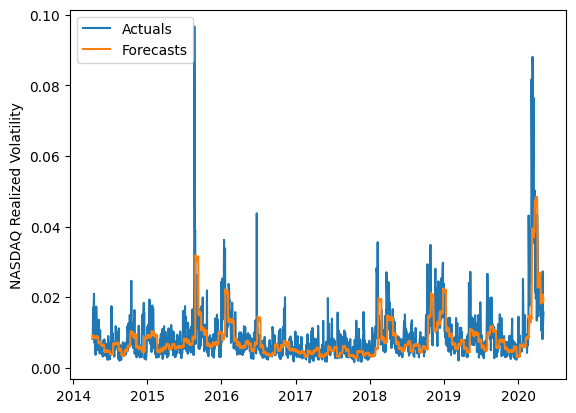

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=22 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range(14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 3
  n_input = 21
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(168, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/22)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,22:,:],[a[j*22:(j+1)*22]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  test=test[:len(test)-19]
  true_predictions=true_predictions.reshape(len(test),1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(test/true_predictions-np.log(test/true_predictions)-1)/len(test))

Epoch 1/7
107/107 [==============================] - 3s 9ms/step - loss: 0.0070 - accuracy: 0.0927 - mean_absolute_error: 0.0534
Epoch 2/7
107/107 [==============================] - 1s 9ms/step - loss: 0.0039 - accuracy: 0.0421 - mean_absolute_error: 0.0391
Epoch 3/7
107/107 [==============================] - 1s 12ms/step - loss: 0.0038 - accuracy: 0.0035 - mean_absolute_error: 0.0397
Epoch 4/7
107/107 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.0021 - mean_absolute_error: 0.0371
Epoch 5/7
107/107 [==============================] - 1s 8ms/step - loss: 0.0033 - accuracy: 0.0015 - mean_absolute_error: 0.0367
Epoch 6/7
107/107 [==============================] - 1s 8ms/step - loss: 0.0033 - accuracy: 0.0371 - mean_absolute_error: 0.0374
Epoch 7/7
1/1 [==============================] - 0s 21ms/step
Epoch 1/7
107/107 [==============================] - 4s 11ms/step - loss: 0.0062 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0527
Epoch 2/7
107/107 [==========

In [8]:
Accuracy

[49.26461140428858,
 40.93471405532457,
 47.85233036987683,
 40.982048348503255,
 38.78270934146213,
 47.98614717848272,
 46.65445460176473,
 46.004749358356705,
 41.985834115711135,
 50.20302944157814,
 47.993137840571784,
 39.64883372354608,
 31.136529898609464,
 21.962000185790057,
 43.999564824040476]

In [24]:
RMSE

[0.00478370503567575,
 0.004837850508757714,
 0.004473009648727153,
 0.004535138449112256,
 0.0048064184068589725,
 0.004575664063615595,
 0.00492134078890105,
 0.004586608236132167,
 0.004592305706532265,
 0.004693228587659684,
 0.004911585870191653,
 0.00527143778694586,
 0.006778291429040633,
 0.0047375248769166494,
 0.004704262914938529]

In [16]:
Quasilikelihood

[0.1999932008730039,
 0.2745242816482144,
 0.19481379563336773,
 0.1870879704281227,
 0.1865731099233606,
 0.22547197048984213,
 0.19030769963256192,
 0.21078822474518955,
 0.24379458882455307,
 0.22809747042263992,
 0.19084084690306063,
 0.19313020466749165,
 0.1938401808126175,
 0.21798201237950962,
 0.18189818661092946]

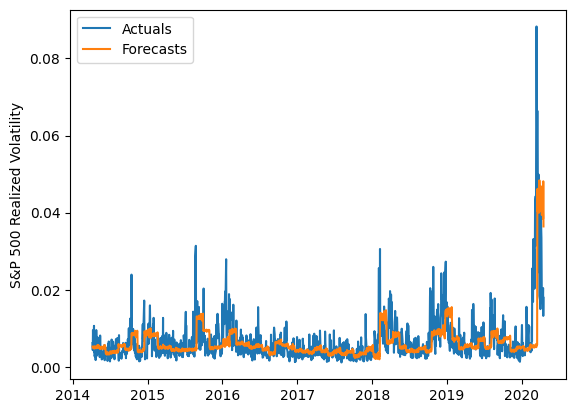

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])